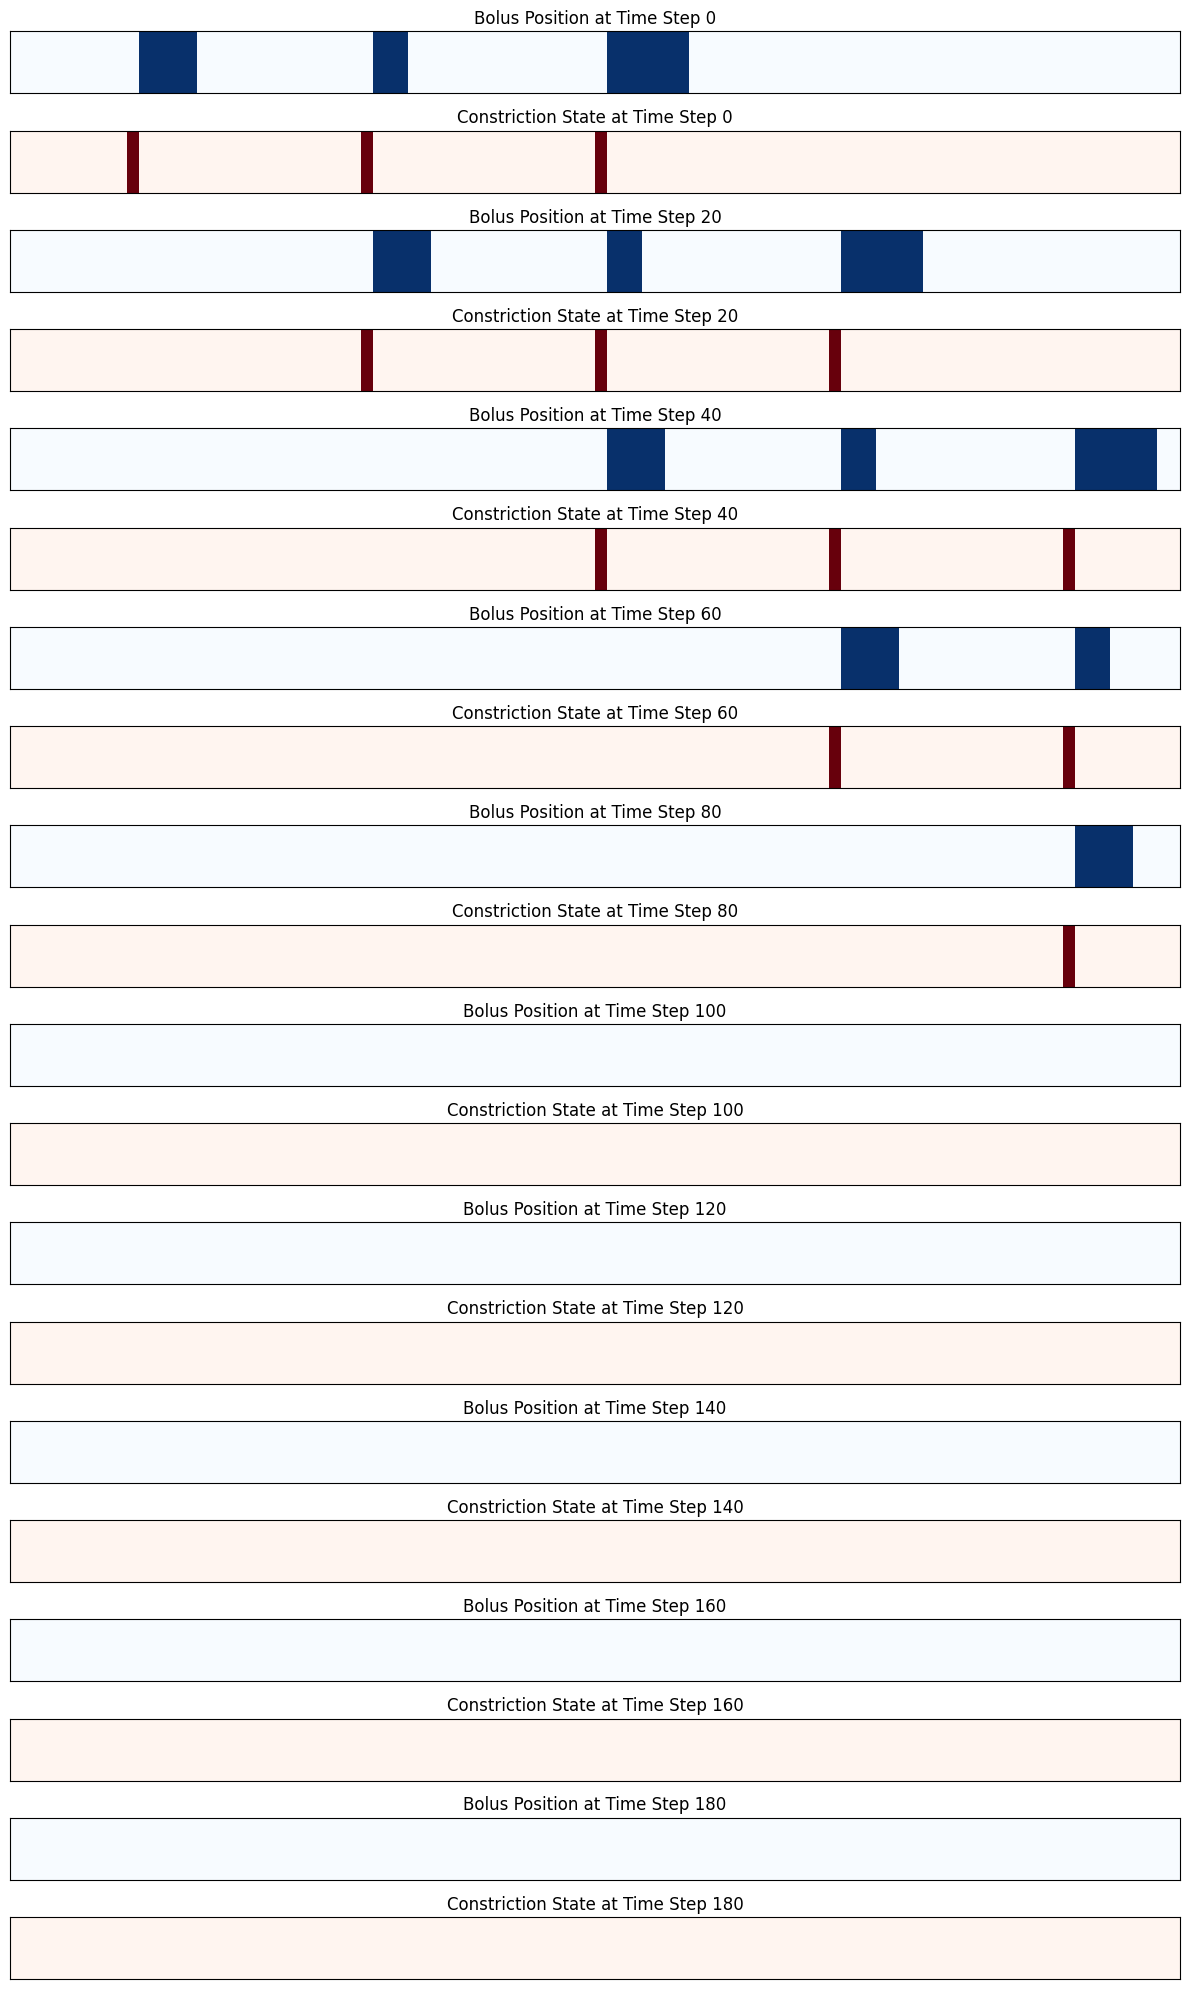

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
length_of_gut = 50  # Length of the gut in arbitrary units
resolution = 100  # Number of segments in the model
time_steps = 200  # Number of time steps to simulate
movement_rate = 3  # Steps required for a constriction to move the bolus
number_of_snapshots = 10  # Number of snapshots to capture during the simulation

# Boluses with varying sizes: a list of tuples (start, size)
boluses = [(10, 5), (30, 3), (50, 7)]

# Initialize the gut state (0 represents relaxed, 1 represents constricted)
gut_state = np.zeros(resolution)

# Initialize bolus positions: for each bolus, mark its segments
bolus_positions = np.zeros(resolution)
for start, size in boluses:
    bolus_positions[start:start+size] = 1

# Update function for the gut and bolus
def update_gut(bolus_positions, gut_state):
    new_bolus_positions = np.zeros_like(bolus_positions)
    new_gut_state = np.zeros_like(gut_state)

    # First loop: Identify the tail of each bolus from end to start
    i = resolution - 1
    while i >= 0:
        if bolus_positions[i] == 1:
            tail = i
            while tail > 0 and bolus_positions[tail - 1] == 1:
                tail -= 1
            # tail is now at the start of the bolus

            # Prepare constriction if the path is clear and the timer has elapsed
            if tail + 1 < resolution and gut_state[tail + 1] == 0:
                new_gut_state[tail] = 1  # Constrict at the tail
        i -= 1

    # Second loop: Move each bolus from start to end
    for i in range(resolution):
        if bolus_positions[i] == 1 and new_gut_state[i] == 1 and i + 1 < resolution and gut_state[i + 1] == 0:
            # Start of bolus identified and constriction is active at this segment
            j = i
            while j < resolution and bolus_positions[j] == 1:
                if j + 1 < resolution:
                    new_bolus_positions[j + 1] = 1  # Move the bolus forward
                j += 1

    return new_bolus_positions, new_gut_state

# Collect data for snapshots
snapshot_steps = np.linspace(0, time_steps, number_of_snapshots, endpoint=False, dtype=int)
snapshots = []

# Run simulation
for t in range(time_steps):
    bolus_positions, gut_state = update_gut(bolus_positions, gut_state)
    if t in snapshot_steps:  # Take a snapshot at specified steps
        snapshots.append((bolus_positions.copy(), gut_state.copy()))

# Plot the snapshots
fig, axes = plt.subplots(2 * len(snapshots), 1, figsize=(12, 2 * len(snapshots)), facecolor='white')
for i, (bolus_snapshot, constriction_snapshot) in enumerate(snapshots):
    # Bolus positions
    axes[2 * i].imshow(bolus_snapshot.reshape(1, -1), aspect='auto', cmap='Blues')
    axes[2 * i].set_xticks([])
    axes[2 * i].set_yticks([])
    axes[2 * i].set_title(f'Bolus Position at Time Step {snapshot_steps[i]}')
    
    # Constriction states
    axes[2 * i + 1].imshow(constriction_snapshot.reshape(1, -1), aspect='auto', cmap='Reds')
    axes[2 * i + 1].set_xticks([])
    axes[2 * i + 1].set_yticks([])
    axes[2 * i + 1].set_title(f'Constriction State at Time Step {snapshot_steps[i]}')

plt.tight_layout()
plt.show()
